No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


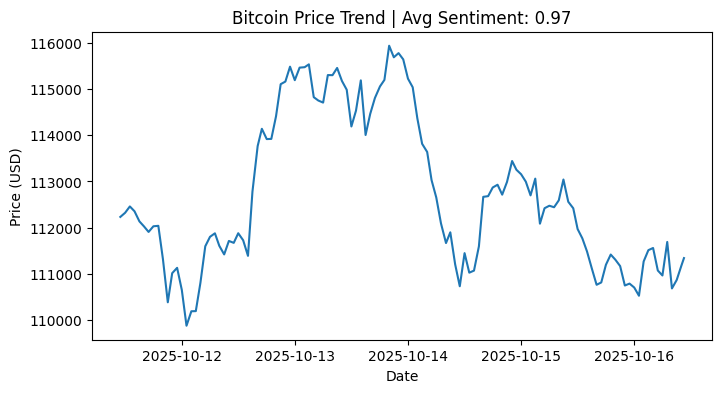

In [11]:
!pip install transformers requests pandas matplotlib torch --quiet

import requests, pandas as pd, matplotlib.pyplot as plt
from transformers import pipeline

#  Sentiment model
sentiment = pipeline("sentiment-analysis")

#  Fetch crypto price data (CoinGecko)
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=5"
data = requests.get(url).json()
prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
prices["timestamp"] = pd.to_datetime(prices["timestamp"], unit="ms")

# Mock news headlines
headlines = [
    "Bitcoin surges as market confidence grows",
    "Investors fear another crash coming soon",
    "New regulations could strengthen crypto stability",
]

# Analyze sentiment
results = sentiment(headlines)
df_sent = pd.DataFrame(results)
avg_sentiment = df_sent['score'].mean()

# Plot market trend
plt.figure(figsize=(8,4))
plt.plot(prices["timestamp"], prices["price"])
plt.title(f"Bitcoin Price Trend | Avg Sentiment: {avg_sentiment:.2f}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


**FETCH LIVE BITCOIN NEWS FROM URL**

In [12]:


import requests, pandas as pd, matplotlib.pyplot as plt
from transformers import pipeline

# Sentiment model
sentiment = pipeline("sentiment-analysis")

#  Fetch crypto price data from CoinGecko
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=5"
data = requests.get(url).json()
prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
prices["timestamp"] = pd.to_datetime(prices["timestamp"], unit="ms")



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [13]:
!pip install feedparser --quiet

import feedparser


In [14]:
# Fetch Bitcoin headlines using CoinDesk RSS (no API key needed)
feed = feedparser.parse("https://www.coindesk.com/arc/outboundfeeds/rss/?outputType=xml&query=bitcoin")
headlines = [entry.title for entry in feed.entries[:10]]

if not headlines:
    headlines = [
        "Bitcoin surges as market confidence grows",
        "Investors fear another crash coming soon",
        "New regulations could strengthen crypto stability",
    ]
    print("⚠️ Could not fetch live headlines — using sample data.\n")

print("📰 Latest Bitcoin Headlines:")
for h in headlines:
    print("-", h)




📰 Latest Bitcoin Headlines:
- Bitfarms Launches $300M Convertible Note Offering, Shares Drop Pre-Market
- Australia's Government Proposes New Powers for AUSTRAC to Restrict Crypto ATMs
- Bitcoin Faces Heavy Selling Pressure Despite Seasonal Bullish Expectations
- France’s Lise Wins License to Launch Europe’s First Tokenized Stock Exchange
- How Deep Could BTC Crash If Bulls Fail to Defend $107K–$110K Support Zone?
- Bitcoin Holds Near $111K as Traders Weigh China Retaliation, Risk Appetite Cools
- Ripple, Immunefi Launch $200K Bug Hunt for XRPL’s New Institutional Lending Protocol
- DOGE Trading Desk Flows Hint Bottoming. Watch $0.214 Flip for Momentum Trigger
- Paxos Fat-Fingers $300T of PayPal Stablecoin, Outpacing USD's $2.4T Supply
- XRP Buildout Near $2.40 Could Precede Sharp Relief Rally if Whales Ease Pressure


In [15]:
# Analyze sentiment
results = sentiment(headlines)
df_sent = pd.DataFrame(results)
avg_sentiment = df_sent['score'].mean()
positive_ratio = (df_sent['label'] == 'POSITIVE').mean()



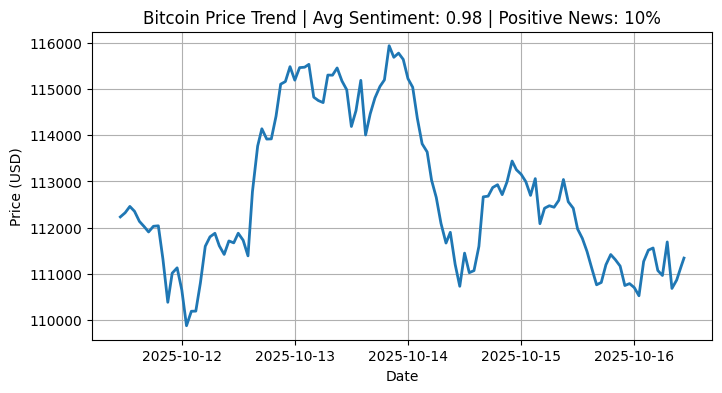

In [16]:
#  Plot market trend with sentiment summary
plt.figure(figsize=(8,4))
plt.plot(prices["timestamp"], prices["price"], linewidth=2)
plt.title(f"Bitcoin Price Trend | Avg Sentiment: {avg_sentiment:.2f} | Positive News: {positive_ratio*100:.0f}%")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()